# TD3 : graphes et l'algorithme PageRank de Google
Cours de **Physique Statistique - OMI 446**, professeur: *Michael Benzaquen*.

Nous allons ici faire la partie pratique du TD : un premier exercice sur un graphe simple avant de passer au calcul du PageRank du graphe des aéroports étatsuniens.

In [1]:
#importation des packages nécessaires 
import numpy as np 
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt
%matplotlib inline

Nous créons d'abord un dictionnaire qui servira de liste d'adjacence. Dans Python, un dictionnaire associe à une "key" (mot-clef) une valeur qui peut être un objet quelconque. Ici `neighbors[noeud]` contient la liste des noeuds adjacents.

In [2]:

neighbors = {}
neighbors['a'] = ['c','b']
neighbors['b'] = ['a','c']
neighbors['c'] = ['d']
neighbors['d'] = ['c', 'e']
neighbors['e'] = ['c']
neighbors['f'] = ['a','g']
neighbors['g'] = ['a']

La fonction `dict.keys()` permet d'accéder à la liste des mots-clefs clefs du dictionnaire.

In [3]:
neighbors.keys()

dict_keys(['a', 'b', 'c', 'd', 'e', 'f', 'g'])

La fonction `dict.items()` permet d'accéder à un itérateur (key,value).

In [4]:
for node, out_list in neighbors.items():
    print("La liste des voisins de", node, "est", out_list)
    
#on peut encore itérer à l'intérieur de la liste des voisins
for node, out_list in neighbors.items():
    print("Les voisins de", node, "sont", end=" ")
    for out in out_list:
        print(out, end=",")
    print("")

La liste des voisins de a est ['c', 'b']
La liste des voisins de b est ['a', 'c']
La liste des voisins de c est ['d']
La liste des voisins de d est ['c', 'e']
La liste des voisins de e est ['c']
La liste des voisins de f est ['a', 'g']
La liste des voisins de g est ['a']
Les voisins de a sont c,b,
Les voisins de b sont a,c,
Les voisins de c sont d,
Les voisins de d sont c,e,
Les voisins de e sont c,
Les voisins de f sont a,g,
Les voisins de g sont a,


Pour créer un graphe dirigé vide avec `networkx` on utilise le constructeur `nx.DiGraph()`.
On peut ensuite ajouter des liens $i\rightarrow j$ avec la fonction `nx.add_edge(i,j)`.

In [5]:
graphe_test = nx.DiGraph()
graphe_test.add_edge('i','j')

On peut ensuite dessiner le graphe de la manière suivante:
1. On demande à networkx de calculer la position des noeuds avec `pos = nx.spring_layout(graphe)` ou `pos = nx.circular_layout(graphe)`
2. On dessine ensuite le graphe avec ces positions `nx.draw(graphe, pos=pos)`
3. On rajoute les étiquettes des noeuds sur les bonnes positions avec `nx.draw_networkx_labels(graphe, pos=pos)`

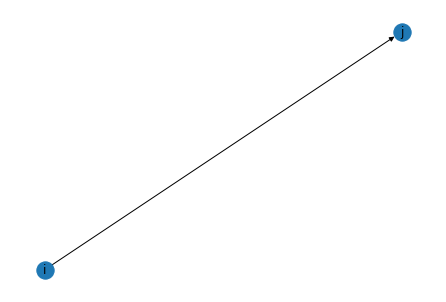

In [6]:
pos = nx.spring_layout(graphe_test)
nx.draw(graphe_test, pos=pos)
nx.draw_networkx_labels(graphe_test, pos=pos);

On peut également extraire une matrice d'adjacence en utilisant la fonction `nx.to_numpy_matrix(graphe)`. 
**REMARQUE** : `networkx` utilise une autre convention pour les matrices d'adjacence. Dans notre convention, $A_{ij}=1$ indique un lien $j\rightarrow i$, alors qu'il s'agit d'un lien $i\rightarrow j$ dans `networkx`. Il est donc nécessaire de transposer la matrice pour avoir la bonne convention à l'aide de la fonction `np.transpose(matrix)`.

Pour vérifier l'ordre dans lequel `networkx` renvoie la matrice, il convient de printer la liste des noeuds du graphe avec `graphe.nodes()`.

In [11]:
matrice_adjacence_test = nx.to_numpy_matrix(graphe_test)
print(matrice_adjacence_test)

print(graphe_test.nodes())

[[0. 1.]
 [0. 0.]]
['i', 'j']


Nous allons maintenant créer le graphe `G` dans la figure du sujet à l'aide du dictionnaire `neighbors`.

## Question 2.1. Création du graphe

En utilisant les aides précédentes, compléter le code suivant

In [8]:
G = nx.DiGraph()
for node, out_list in neighbors.items():
    for out_node in out_list:
        G.add_edge(node, out_node)


Nous allons ensuite associer à la variable `B` la matrice d'adjacence du graphe

In [12]:
B = nx.to_numpy_matrix(G)

In [13]:
#on vérifie
print(B)
print(G.nodes())

[[0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]]
['a', 'c', 'b', 'd', 'e', 'f', 'g']


In [14]:
#on stocke la taille du graphe
N_nodes = len(G.nodes())

Nous créons d'abord pour nous aider un vecteur `out_degrees` de taille `N_nodes` tel que `out_degrees[i]` contient $\sum_{k=1}^N A_{ki}$ 

In [17]:
out_degrees = np.zeros(N_nodes)

for i in range(N_nodes):
    for k in range(N_nodes):
        out_degrees[i] += B[i,k]
print(out_degrees)

[2. 1. 2. 2. 1. 2. 1.]


## Question 2.2. Calcul de la matrice de transition

Compléter le code

In [ ]:
transition_mat = np.zeros((N_nodes, N_nodes))
for j in range(N_nodes):
    if out_degrees[j] != 0 :
        for i in range(N_nodes):
            #A COMPLETER

On vérifie à nouveau

In [ ]:
print(transition_mat)

## Question 2.4. Application de l'algorithme PageRank

Remarque: la fonction `np.dot(A,B)` permet de calculer le produit (matriciel) $AB$, y compris lorsque $B$ est un vecteur. 

La fonction `np.ones(N)` renvoie le vecteur $(1,1,\ldots,1)\in\mathbb{R}^N$

In [ ]:
A_example = np.array([[1,2],[3,4]])
B_example = np.array([1,2])

print(A_example)
print(B_example)
print("Resultat du produit", end=" ")
print(np.dot(A_example, B_example))

In [ ]:
v = np.ones(N_nodes) / N_nodes
print(v)

print(np.ones(4)/4)

In [ ]:
### écrire l'algorithme PageRank avec d=0.85 et P_0 = (1/N,...,1/N)

P = ## A COMPLETER
d = 0.85
n_its = 100

for i in range(n_its):
    ## A COMPLETER



Nous créons ensuite un DataFrame pour visualiser le PageRank de chaque noeud

In [ ]:
G_nodes = list(G.nodes())
G_pagerank = pd.DataFrame(list(zip(G_nodes, P)), columns=['Node','PageRank'])
G_pagerank

On rajoute des informations supplémentaires, comme le *in-degree* (nombre de liens entrants) et le *out-degree* de chaque noeud

In [ ]:
G_pagerank['In_degree'] = G_pagerank.Node.apply(lambda x: G.in_degree()[x])
G_pagerank['Out_degree'] = G_pagerank.Node.apply(lambda x: G.out_degree()[x])

In [ ]:
G_pagerank

On peut également dessiner le graphe comme précédemment

In [ ]:
pos = nx.circular_layout(G)

nx.draw(G, pos)
nx.draw_networkx_labels(G,pos);

## Partie 3 : Application au graphe des aéroports

Nous chargeons d'abord les données : il s'agit d'un tableau avec l'aéroport d'origine, l'aéroport de destination et le nombre de vols entre eux

In [18]:
df = pd.read_csv('data_airports.csv')
df = df.drop(columns=df.columns[0])
df.head(10)

,ORIGIN,DEST,COUNT
0,05A,ARC,1
1,05A,CXF,2
2,05A,FAI,13
3,05A,WCR,1
4,09A,ADQ,1
5,1G4,1G4,9
6,1G4,BLD,9
7,1G4,DQS,6
8,1G4,GCN,5
9,1G4,KNB,4


Pour que `networkx` comprenne que le poids de chaque lien est donné par `COUNT` nous allons renommer cette colonne


In [19]:
df = df.rename(columns={'COUNT':'weight'} )
df.head(10)

,ORIGIN,DEST,weight
0,05A,ARC,1
1,05A,CXF,2
2,05A,FAI,13
3,05A,WCR,1
4,09A,ADQ,1
5,1G4,1G4,9
6,1G4,BLD,9
7,1G4,DQS,6
8,1G4,GCN,5
9,1G4,KNB,4


Nous créons ensuite le graphe des aéroports avec la fonction `networkx.from_pandas_edgelist` qui prend en argument un `pd.DataFrame`, ainsi que `airport_list` qui contiendra la liste des noeuds du graphe (liste des aéroports) et `N_airports` qui est le nombre de noeuds.


In [20]:
airport_graph = nx.from_pandas_edgelist(df, source='ORIGIN', target='DEST', edge_attr='weight',
                                         create_using=nx.DiGraph())
airports_list = list(airport_graph.nodes())
N_airports = len(airports_list)

## Question 3.1 Création de la matrice de transition

Comme pour le graphe précédent, créer la matrice de transition associée au graphe.
On appelera `A` la matrice d'adjacence et `T` la matrice de transition.
 
On pourra d'abord créer un vecteur `airport_out_degrees` dont la i-ème valeur contiendra la somme $\sum_{k=1}^N A_{ki}$ 

In [23]:
A = nx.to_numpy_matrix(airport_graph)
aiports_out_degrees = np.zeros(N_airports)

for i in range(N_airports):
    for k in range(N_airports):
        aiports_out_degrees[i] += A[i,k]

## Question 3.2 calcul du PageRank

Calculez le PageRank du graphe des aéroports en le stockant dans un vecteur `X` dont on prendra la valeur initiale `X=np.ones(N_airports)/N_airports`, en faisant $100$ itérations et en prenant `d=0.85`

In [ ]:
## A COMPLETER

Créer le DataFrame `PageRank_df` pour visualiser les données. Représentez les 10 premiers aéroports de la liste.

In [ ]:
### A COMPLETER

 Trier les aéroports par PageRank décroissant et visualiser les 10 premiers

In [ ]:
#A COMPLETER

## Fin et remarques

On peut se demander, pourquoi l'aéroport d'Anchorage est si important ? La réponse:

*Alaska is a sparsely populated, isolated region with a disproportionately large, for its population size, number of airports. Most Alaskan airports have connections only to other Alaskan airports. This fact makes sense geographically. However, distance-wise, it also would make sense for some Alaskan airports to be connected to airports in Canada’s Northern Territories. These connections are, however, absent. Instead, a few Alaskan airports, singularly Anchorage, are connected to the continental U.S. The reason is clear: the Alaskan population needs to be connected to the political centers, which are located in the continental U.S., whereas there are political constraints making it difficult to have connections to cities in Canada, even to ones that are close geographically ([Guimera and Amaral, 2004]). It is now obvious why Anchorage’s centrality is so large. Indeed, the existence of nodes with anomalous centrality is related to the existence of regions with a high density of airports but few connections to the outside. The degree-betweenness anomaly is therefore ultimately related to the existence of communities in the network.*


Pour montrer cela, nous allons directement utiliser les fonctions de `networkx` pour calculer une autre mesure de l'importance d'un noeud dans le graphe, la *betweenness centrality*, qui mesure à quel point un noeud $i$ est central dans le graphe : avec cette mesure, un noeud $i$ a une betweenness elevée si pour deux noeuds quelconques $j$ et $k$ il est nécessaire de passer par $i$ pour les relier. 

In [24]:
betweenness = nx.betweenness_centrality(airport_graph)

In [25]:
PageRank_df['Betweenness'] = PageRank_df.Airport.apply(lambda x: betweenness[x])

NameError: name 'PageRank_df' is not defined

On peut alors remarquer que ANC a une betweenness remarquablement élevée ! 

In [ ]:
PageRank_df.head(10)

On pourra aussi tracer le sous-graphe des $40$ aéroports avec le PageRank le plus élevé en prenant le sous-graphe correspondant.

In [ ]:
top_40_airports = PageRank_df.head(40).Airport
k = airport_graph.subgraph(top_40_airports)


plt.figure(figsize=(10,10))
pos = nx.spring_layout(k)
nx.draw(k, pos=pos, edge_color='blue',node_size=600)
nx.draw_networkx_labels(k, pos=pos);